# Data Analysis for 'Balanced' Hate Speech (HS) Dataset

### - class / category analysis of labeled data
### - category analysis for 'raw' HS Samples

### INTRODUCTION

The scripts were created and published by Merja Kreivi-Kauppinen, and are part of research work carried in University of Oulu in 2020-2023. The study is reported on (Master’s Thesis) research paper - Merja Kreivi-Kauppinen (2024) Hate Speech Detection of Dialectal, Granular and Urban Finnish. University of Oulu, Degree Programme in Computer Science and Engineering. Master’s Thesis.


### DATASET

The dataset of collected and generated research data is not shared or published.


### Manually labeled HS dataset

Every sample in dataset were labelled manually with trinary sentiment, multilabel polarity, and binary HS subcategory. 

- SA trinary - trinary sentiment
- SA polarity - multilabel polarity sentiment
- HSbinary- binary HS

Polarity and sentiment subcategories summed up the individual components or sentiments of content. The presence or absence of HS in sample was labelled with HS binary categoriy - ‘not including hate speech’ (not HS) or ‘hate speech’ (HS). 

Data samples belonging to the HS (‘HS’) subcategory (of HSbinary main category) were manually labelled with HS related subcategorylabels of HS target, topic, form, and strength categories.

- HS target
- HS topic
- HS form, and 
- HS strength


### SA sentiment

Every sample in dataset is labelled into ‘positive’, ‘neutral’, or ‘negative’ sentiment analysis subcategory on ‘sentiment’ main category.

- trinary sentiment subcategory: ‘positive’, ‘neutral’ or ‘negative’
- binary sentiment subcategory: ‘positive’ (incl. postive and neutral) or ‘negative’


### SA polarity

Every sample in dataset is labelled into sentiment polarization main category ‘polarity’, that is used to manual labelling of an estimate of overall sentiment polarity level into one of eleven polarity subcategory between -5 and 5.

- polarity subcategory: ‘-5’, ‘-4’,‘-3’, ‘-2’, ‘-1’, ‘0’, ‘1’, ‘2’, ‘3’, ‘4’ or ‘5’


### HSbinary

On the main hate speech category ‘HSbinary’ every sample in dataset is labelled into HS subcategory - ‘HS’ or ‘not HS’ (as ‘not including hate speech’) by binary classification.

- HSbinary subcategory: ‘HS’ or ‘not HS’


### HStarget

On the HS target category ‘HStarget’, the HS sample was labeled into one HStarget subcategory.

‘HStarget’ subcategories labeled the target, object, or victim of the HS into one of five following subcategories:

- ‘person’ (individual, person or his/her closed ones), 
- (small) ‘group’, 
- (large) ‘community’,  
- ‘self-hate’ (hateful speech against him/her-self), or 
- ‘self-harm’ (violent or harmful speech against him/her-self). 
- ‘none’ (not identified or included)- In ‘none’-subcategory the target is not mentioned, or HS is presented as trolling, where clear target does not exist.


### HStopic

HS topic category ‘HStopic’ was used to label every HS sample in dataset according to content into one or several topic subcategories.

‘HStopic’ category included eighteen (18) different subcategories:
- national, ethnic, foreign, immigration, religion, politics, opinion, work, sexual, gender, women, appearance, health, status, social media, family, trolling, and other


### HSform

HS form category ‘HSform’ was used to label every HS sample in dataset according to content into one or several form, type, or style describing subcategories. 

'HSform' category included fourteen (14) different subcategories:
- threat, insult, discrimination, harassment, incitement, disinformation, targeting, joke, idiom, swearing, violence, bully, granulated, and undefined. 

The undefined subcategory is available for complex cases to smooth manual labelling process.


### HSstrength

HS strength category ‘HSstrength’ was used to label every HS sample in dataset to dimension of HS according to rising hatefulness levels,  where subcategories provide an estimate of how hateful, hostile, violent, aggressive, harassing, harmful, abusive, and intentional a sample content is. 

– ‘0’, ‘1’, ‘2’, ‘3’, ‘4’, or ‘5’

- '1' - mild (lievä)
- '2' - weak (heikko)
- '3' - moderate (kohtalainen)
- '4' - strong (vahva)
- '5' - very strong	(erittäin vahva)

‘HSstrength’ subcategories (or HS strength levels) define how hateful or violent HS is, or how illegal HS is. 'HSstrength' level of HS sample is given according to most hateful content or feature. For example, if content includes swear words, one swear word gives strength level ‘1’, two swear words level ‘2’, and ‘3’ (or more) gives level ‘3’. If a comment includes verbal violence, such as content that includes a threat or incitement to kill, rape, or assault, strength level is ‘5’. 

### DATA ANALYSIS

Created dataset was evaluated by sample string length analysis and label categories distribution analysis.

## Import python packages and libraries

In [1]:
# import python packages and libraries

import sys, re, os, openpyxl
import tqdm
from tqdm import tqdm
import tqdm as notebook_tqdm

import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")

print(f"\nPython Version: {sys.version} \n")
print(sys.executable)
print(sys.version)
print(sys.version_info)
print('\njupyter version: \n')
!jupyter --version

import time, datetime, random, string
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from pylab import rcParams

# set seaborn figures
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
sns.set(style='darkgrid', palette='muted', font_scale=1.0)

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

Tensor Flow Version: 2.5.0
Keras Version: 2.5.0

Python Version: 3.9.13 (main, Oct 13 2022, 21:23:06) [MSC v.1916 64 bit (AMD64)] 

C:\Users\merja\anaconda3\envs\NLPtfgpu\python.exe
3.9.13 (main, Oct 13 2022, 21:23:06) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)

jupyter version: 

Selected Jupyter core packages...
IPython          : 8.5.0
ipykernel        : 6.16.0
ipywidgets       : 8.0.2
jupyter_client   : 7.4.2
jupyter_core     : 4.11.1
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.7.0
nbconvert        : 7.2.1
nbformat         : 5.7.0
notebook         : 6.4.12
qtconsole        : not installed
traitlets        : 5.4.0
The scikit-learn version is 1.1.2.


# Create new dataset - Balanced dataset

## Download HS Data Set for Analysis

### Download Manually Annotated Collection All HS Data


### Concatenate datasets

# Distribution of sample length and categories in full / complete 'balanced' dataset

In [2]:
# Download labeled HS data from xlsx file to pd dataFolder

cwd = os.getcwd()
folder = '\\data\\'
csv_file = 'Balanced_Dataset_Collection_ALL_2023Merja.xlsx'
csv_source = cwd + folder + csv_file
#print(csv_source)
df = pd.read_excel(csv_source)
df

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick
0,- - opetustilanteisiin,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",neutral,0,False,0,NaN,NaN,NaN,FinnSentiment
2,= Minulle on tullut Playboy vuodesta 1972 läh...,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment
3,=) (Juuri sellaiset joita suomessa myydään ha...,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment
4,=) kristiina ja anna jatkoon! =),positive,3,False,0,NaN,NaN,NaN,FinnSentiment
...,...,...,...,...,...,...,...,...,...
16003,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,positive,5,False,0,NaN,NaN,NaN,Meria
16004,😠👉👩‍💼,negative,-3,False,0,NaN,NaN,NaN,Meria
16005,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,positive,5,False,0,NaN,NaN,NaN,Meria
16006,🤮😡,negative,-4,False,0,NaN,NaN,NaN,Meria


In [3]:
# Change text samples to string
df["cleantext"] = df[str("sample")]

# add string len column
df["string_length"] = ""

# extract string length measures of data
def extract_stringLength(df):
    for item in df["cleantext"]:
        #newframe["string_length"] = len(str(item))
        df["string_length"] = df.cleantext.str.len()
    return df

extract_stringLength(df)
#df.head(50)
df

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick,cleantext,string_length
0,- - opetustilanteisiin,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment,- - opetustilanteisiin,22
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",neutral,0,False,0,NaN,NaN,NaN,FinnSentiment,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",85
2,= Minulle on tullut Playboy vuodesta 1972 läh...,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment,= Minulle on tullut Playboy vuodesta 1972 läh...,51
3,=) (Juuri sellaiset joita suomessa myydään ha...,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment,=) (Juuri sellaiset joita suomessa myydään ha...,116
4,=) kristiina ja anna jatkoon! =),positive,3,False,0,NaN,NaN,NaN,FinnSentiment,=) kristiina ja anna jatkoon! =),34
...,...,...,...,...,...,...,...,...,...,...,...
16003,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,positive,5,False,0,NaN,NaN,NaN,Meria,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,14
16004,😠👉👩‍💼,negative,-3,False,0,NaN,NaN,NaN,Meria,😠👉👩‍💼,5
16005,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,positive,5,False,0,NaN,NaN,NaN,Meria,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,10
16006,🤮😡,negative,-4,False,0,NaN,NaN,NaN,Meria,🤮😡,2


Min text data length is:   1
Max text data length is:   1785
Mean text data length is:   67.5705272363818
The standard deviation is:   82.99430702981779
The data count is:   16008


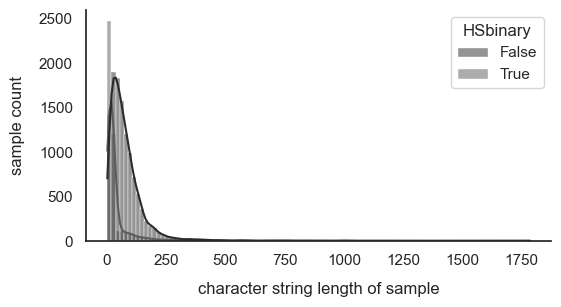

In [4]:
# all balanced dataset

MIN_LENGTH = int(0)

minDF = df[df["string_length"] > MIN_LENGTH]
largeDF = minDF

print("Min text data length is:  ", largeDF.cleantext.str.len().min())

# Define the longest string length in data
print("Max text data length is:  ", largeDF.cleantext.str.len().max())

# Define the mean string length in data
print("Mean text data length is:  ", largeDF.cleantext.str.len().mean())

# Define the standard deviation in string length
print("The standard deviation is:  ", largeDF["string_length"].std())

# Define len of data
print("The data count is:  ", len(largeDF))

#rcParams['figure.figsize'] = 6, 3
plt.figure(figsize=(6,3))

sns.set(style='white', palette='Greys_r', font_scale=1.0)
#sns.set(style='darkgrid', palette='Greys_r', font_scale=1.0)
#sns.set(style='dark', palette='Greys_r', font_scale=1.0)

sns.histplot(data=largeDF, 
    x="string_length", 
    bins=103, 
    #hue="sentiment", 
    hue="HSbinary",
    kde=True)
sns.despine()

plt.xlabel("character string length of sample", labelpad=10)
plt.ylabel("sample count", labelpad=10)
#plt.title("Histogram of string lengths of all raw data samples", y=1.02);

cwd = os.getcwd()
folder = '\\figures\\'
file = 'string_length_histogram_of_all_data.png'
source = cwd + folder + file
plt.savefig(source)

#plt.savefig('\\FIGURES\\string_length_of_all_data.png')
#plt.show()

## The length of data samples was limited to 850

Min text data length is:   1
Max text data length is:   845
Mean text data length is:   66.28919054172401
The standard deviation is:   75.20841985292323
The data count is:   15986


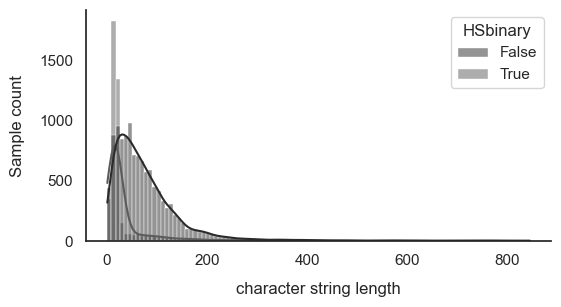

In [5]:
# limit the maximum chracter length to 512 chars
# collect samples which char length is 512 chars or below 

MIN_LENGTH = int(0)
MAX_LENGTH = int(850)

minDF = df[df["string_length"] > MIN_LENGTH]
largeDF = minDF[minDF["string_length"] <= MAX_LENGTH] 

print("Min text data length is:  ", largeDF.cleantext.str.len().min())

# Define the longest string length in data
print("Max text data length is:  ", largeDF.cleantext.str.len().max())

# Define the mean string length in data
print("Mean text data length is:  ", largeDF.cleantext.str.len().mean())

# Define the standard deviation in string length
print("The standard deviation is:  ", largeDF["string_length"].std())

# Define len of data
print("The data count is:  ", len(largeDF))

#rcParams['figure.figsize'] = 6, 3
plt.figure(figsize=(6,3))

sns.set(style='white', palette='Greys_r', font_scale=1.0)
#sns.set(style='darkgrid', palette='Greys_r', font_scale=1.0)
#sns.set(style='dark', palette='Greys_r', font_scale=1.0)

sns.histplot(data=largeDF, 
    x="string_length", 
    bins=103, 
    #hue="sentiment", 
    hue="HSbinary",
    kde=True)
sns.despine()

plt.xlabel("character string length", labelpad=10)
plt.ylabel("Sample count", labelpad=10)
#plt.title("Histogram of string lengths below 512 chars", y=1.02);

cwd = os.getcwd()
folder = '\\figures\\'
file = 'string_length_histogram_of_512_samples.png'
source = cwd + folder + file
plt.savefig(source)

#plt.savefig('string_length_of_512_samples.png')
#plt.show()

longSamplesDF = largeDF

<AxesSubplot: ylabel='Frequency'>

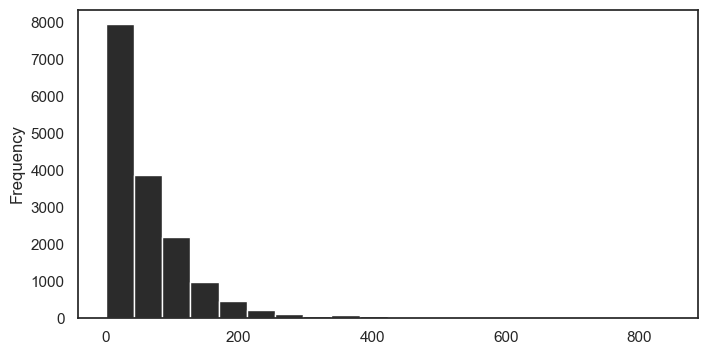

In [6]:
longSamplesDF["string_length"].plot.hist(bins=20, figsize=(8, 4))

Max text data length is:   300
Mean text data length is:   59.59546843177189
The standard deviation is:   53.10580132515547
The data count is:   15712


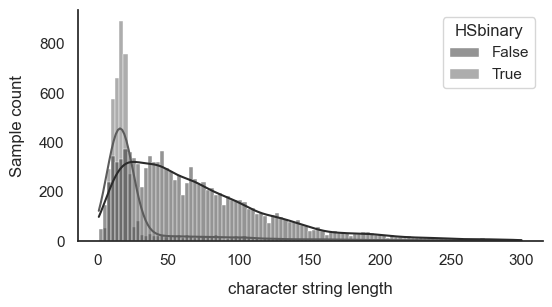

In [7]:
# limit the maximum chracter length to 300 chars

MIN_LENGTH = int(0)
MAX_LENGTH = int(300)

minDF = df[df["string_length"] > MIN_LENGTH]
mediumDF = minDF[minDF["string_length"] <= MAX_LENGTH] 
#largeDF

# Define the longest string length in data
print("Max text data length is:  ", mediumDF.cleantext.str.len().max())

# Define the mean string length in data
print("Mean text data length is:  ", mediumDF.cleantext.str.len().mean())

# Define the standard deviation in string length
print("The standard deviation is:  ", mediumDF["string_length"].std())

# Define len of data
print("The data count is:  ", len(mediumDF))

#rcParams['figure.figsize'] = 6, 3
plt.figure(figsize=(6,3))

sns.set(style='white', palette='Greys_r', font_scale=1.0)
#sns.set(style='darkgrid', palette='Greys_r', font_scale=1.0)
#sns.set(style='dark', palette='Greys_r', font_scale=1.0)

sns.histplot(data=mediumDF, 
    x="string_length", 
    bins=103, 
    #hue="sentiment", 
    hue="HSbinary",
    kde=True)
sns.despine()

plt.xlabel("character string length", labelpad=10)
plt.ylabel("Sample count", labelpad=10)
#plt.title("Histogram of string lengths below 256 chars", y=1.02);

cwd = os.getcwd()
folder = '\\figures\\'
file = 'string_length_histogram_samples.png'
source = cwd + folder + file
plt.savefig(source)

#plt.savefig('histogram_of_256_samples.png')
#plt.show()

mediumSamplesDF = mediumDF

<AxesSubplot: ylabel='Frequency'>

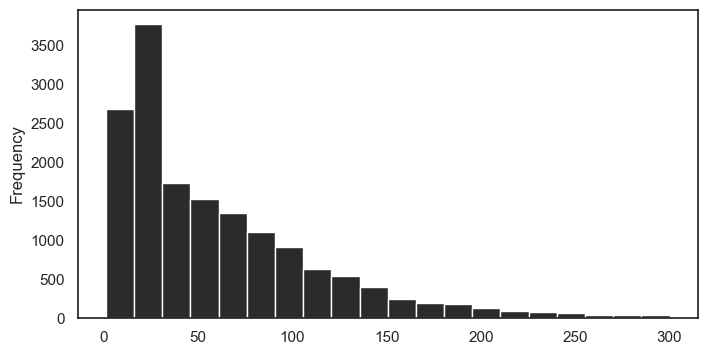

In [8]:
mediumSamplesDF["string_length"].plot.hist(bins=20, figsize=(8, 4))

In [9]:
# Define smaller groups 

mediumSamples = df[df["string_length"] <= 300]
print("length of medium Samples ", len(mediumSamples))

longSamples = df[df["string_length"] <= 850]
print("length of long Samples ", len(longSamples))


length of medium Samples  15712
length of long Samples  15986


## Distribution of sentiment labels in long and short samples dataset

In [10]:
# count values of each label type
df['sentiment'].value_counts()

neutral     5336
positive    5336
negative    5336
Name: sentiment, dtype: int64

The amount of samples in all dataset:  16008


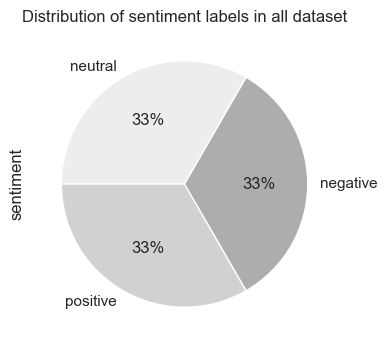

In [11]:
# set sns Seaborn style, color palette, and font to use
#sns.set_theme(style='dark', palette='pastel', font_scale=1.0)
#sns.set_theme(style='dark', palette='colorblind', font_scale=1.0)

plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

# set pie chart parameters
df['sentiment'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%',  
                                          #explode = (0.05, 0.05), 
                                          startangle=60, 
                                          title='Distribution of sentiment labels in all dataset')

cwd = os.getcwd()
folder = '\\figures\\'
file = 'distribution_of_sentiment_labels_in_all_data.png'
source = cwd + folder + file
plt.savefig(source)

#plt.savefig('distribution_of_sentiment_labels_in_all_data.png')
#plt.show()
                                               
print("The amount of samples in all dataset: ", len(df))

In [12]:
# count values of each label type
longSamples['sentiment'].value_counts()

neutral     5332
positive    5332
negative    5322
Name: sentiment, dtype: int64

The amount of samples in longSamplesDF dataset:  15986


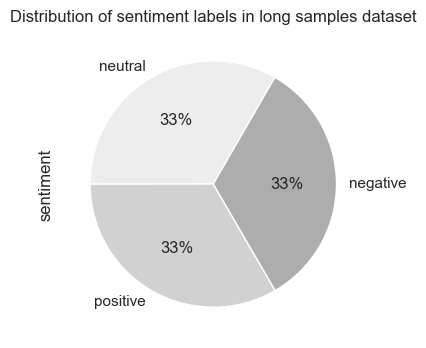

In [13]:
# set sns Seaborn style, color palette, and font to use
#sns.set_theme(style='dark', palette='pastel', font_scale=1.0)
#sns.set_theme(style='dark', palette='colorblind', font_scale=1.0)

plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

# set pie chart parameters
longSamples['sentiment'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%',  
                                          #explode = (0.05, 0.05), 
                                          startangle=60, 
                                          title='Distribution of sentiment labels in long samples dataset')

cwd = os.getcwd()
folder = '\\figures\\'
file = 'distribution_of_sentiment_labels_in_long_data.png'
source = cwd + folder + file
plt.savefig(source)

#plt.savefig('distribution_of_sentiment_labels_in_long_data.png')
#plt.show()
                                 
print("The amount of samples in longSamplesDF dataset: ", len(longSamples))

In [14]:
# count values of each label type
mediumSamples['sentiment'].value_counts()

positive    5271
neutral     5258
negative    5183
Name: sentiment, dtype: int64

The amount of samples in mediumSamplesDF dataset:  15712


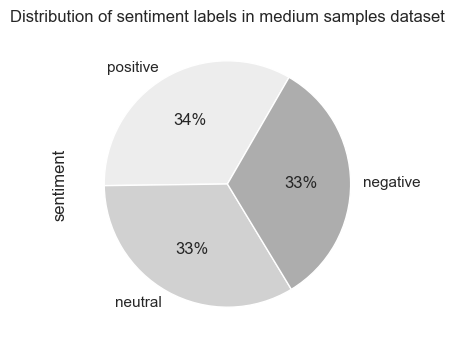

In [15]:
# set sns Seaborn style, color palette, and font to use
#sns.set_theme(style='dark', palette='pastel', font_scale=1.0)
#sns.set_theme(style='dark', palette='colorblind', font_scale=1.0)

plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

# set pie chart parameters
mediumSamples['sentiment'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%', 
                                          #colors=['silver', 'pink'], 
                                          #explode = (0.05, 0.05), 
                                          startangle=60, 
                                          title='Distribution of sentiment labels in medium samples dataset')

cwd = os.getcwd()
folder = '\\figures\\'
file = 'distribution_of_sentiment_labels_in_medium_data.png'
source = cwd + folder + file
plt.savefig(source)

#plt.savefig('distribution_of_sentiment_labels_in_medium_data.png')
#plt.show()

print("The amount of samples in mediumSamplesDF dataset: ", len(mediumSamples))

## Distribution of polarity labels in long and short samples dataset

The amount of samples in longSamplesDF dataset:  16008


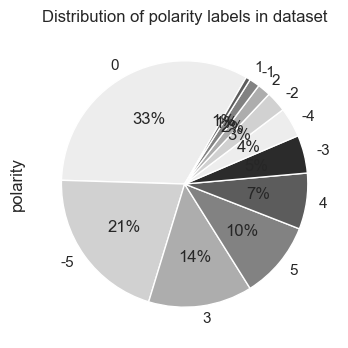

In [16]:
# Distribution of polarity labels
# polarity values: 5 := (+2, positive), 
#                  4 := (+1, positive), 
#                  3 := (0, neutral), 
#                  2 := (-1, negative), 
#                  1 := (-2, negative)

# set sns Seaborn style, color palette, and font to use
#sns.set_theme(style='dark', palette='pastel', font_scale=1.0)
#sns.set_theme(style='dark', palette='colorblind', font_scale=1.0)

plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

# set pie chart parameters
df['polarity'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%', 
                                          #colors=['silver', 'pink'], 
                                          #explode = (0.05, 0.05), 
                                          startangle=60, 
                                          title='Distribution of polarity labels in dataset')

cwd = os.getcwd()
folder = '\\figures\\'
file = 'distribution_of_polarity_labels_in_all_data.png'
source = cwd + folder + file
plt.savefig(source)

#plt.savefig('distribution_of_polarity_labels_in_all_data.png')
#plt.show()

print("The amount of samples in longSamplesDF dataset: ", len(df))

The amount of samples in longSamplesDF dataset:  15986


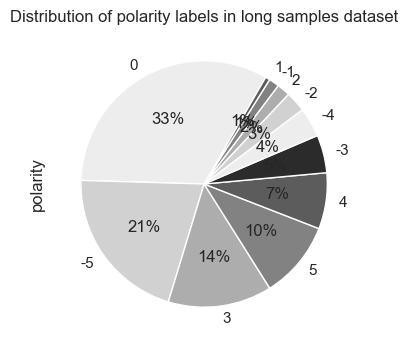

In [17]:
# Distribution of polarity labels
# polarity values: 5 := (+2, positive), 
#                  4 := (+1, positive), 
#                  3 := (0, neutral), 
#                  2 := (-1, negative), 
#                  1 := (-2, negative)

# set sns Seaborn style, color palette, and font to use
#sns.set_theme(style='dark', palette='pastel', font_scale=1.0)
#sns.set_theme(style='dark', palette='colorblind', font_scale=1.0)

plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

# set pie chart parameters
longSamples['polarity'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%', 
                                          #colors=['silver', 'pink'], 
                                          #explode = (0.05, 0.05), 
                                          startangle=60, 
                                          title='Distribution of polarity labels in long samples dataset')

cwd = os.getcwd()
folder = '\\figures\\'
file = 'distribution_of_polarity_labels_longSamples.png'
source = cwd + folder + file
plt.savefig(source)

#plt.savefig('distribution_of_polarity_labels_longSamples.png')
#plt.show()

print("The amount of samples in longSamplesDF dataset: ", len(longSamples))

The amount of samples in medium samples dataset:  15712


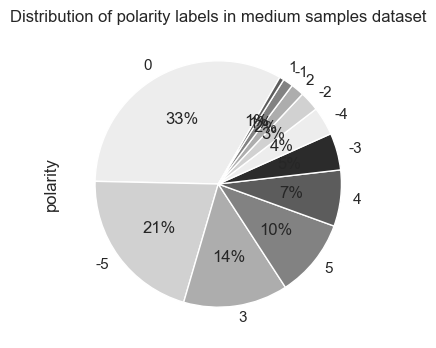

In [18]:

# set sns Seaborn style, color palette, and font to use
#sns.set_theme(style='dark', palette='pastel', font_scale=1.0)
#sns.set_theme(style='dark', palette='colorblind', font_scale=1.0)

plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

# set pie chart parameters
mediumSamples['polarity'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%', 
                                          #colors=['silver', 'pink'], 
                                          #explode = (0.05, 0.05), 
                                          startangle=60, 
                                          title='Distribution of polarity labels in medium samples dataset')

cwd = os.getcwd()
folder = '\\figures\\'
file = 'distribution_of_polarity_labels_mediumSamples.png'
source = cwd + folder + file
plt.savefig(source)

#plt.savefig('distribution_of_polarity_labels_mediumSamples.png')
#plt.show()

print("The amount of samples in medium samples dataset: ", len(mediumSamples))

## Distribution of 'HS binary' labels in long and short samples dataset

In [19]:
# count values of each label type
longSamplesDF['HSbinary'].value_counts()

False    11538
True      4448
Name: HSbinary, dtype: int64

The amount of samples in dataset:  16008


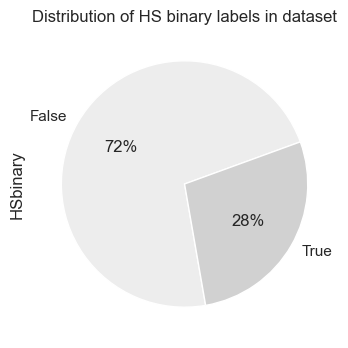

In [20]:
# set sns Seaborn style, color palette, and font to use
sns.set_theme(style='dark', palette='pastel', font_scale=1.0)
#sns.set_theme(style='dark', palette='colorblind', font_scale=1.0)

plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

df['HSbinary'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%', 
                                          #colors=['silver', 'pink'], 
                                          #explode = (0.05, 0.05), 
                                          startangle=20, 
                                          title='Distribution of HS binary labels in dataset')

cwd = os.getcwd()
folder = '\\figures\\'
file = 'distribution_of_HS_binary_labels_in_data.png'
source = cwd + folder + file
plt.savefig(source)

#plt.savefig('distribution_of_HS_binary_labels_in_data.png')
#plt.show()

print("The amount of samples in dataset: ", len(df))

The amount of samples in longSamplesDF dataset:  15986


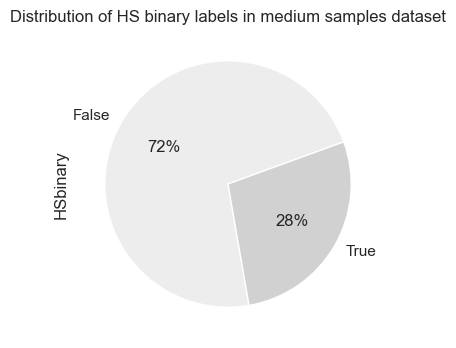

In [21]:
# set sns Seaborn style, color palette, and font to use
sns.set_theme(style='dark', palette='pastel', font_scale=1.0)
#sns.set_theme(style='dark', palette='colorblind', font_scale=1.0)

plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

longSamplesDF['HSbinary'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%', 
                                          #colors=['silver', 'pink'], 
                                          #explode = (0.05, 0.05), 
                                          startangle=20, 
                                          title='Distribution of HS binary labels in medium samples dataset')

#plt.savefig('distribution_of_HS_binary_labels_in_longSamples.png')
#plt.show()

print("The amount of samples in longSamplesDF dataset: ", len(longSamplesDF))

The amount of samples in shortSamplesDF dataset:  15712


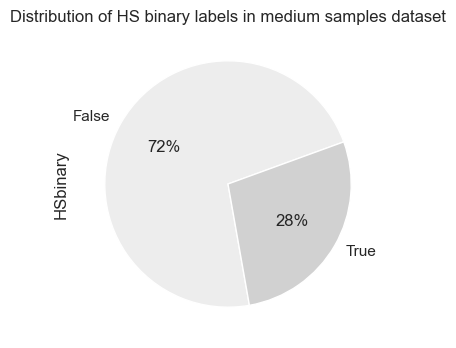

In [22]:
# set sns Seaborn style, color palette, and font to use
sns.set_theme(style='dark', palette='pastel', font_scale=1.0)
#sns.set_theme(style='dark', palette='colorblind', font_scale=1.0)

plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

mediumSamples['HSbinary'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%', 
                                          #colors=['silver', 'pink'], 
                                          #explode = (0.05, 0.05), 
                                          startangle=20, 
                                          title='Distribution of HS binary labels in medium samples dataset')

#plt.savefig('distribution_of_HS_binary_labels_medium_samples.png')
#plt.show()

print("The amount of samples in shortSamplesDF dataset: ", len(mediumSamples))

In [23]:
mediumSamples['HSbinary'].value_counts()

False    11348
True      4364
Name: HSbinary, dtype: int64

# Distribution Analysis for 'HS' samples
## Distribution of 'HS strength' labels in long samples dataset

In [24]:
# count values of each label type in ALL long samples dataset
#longSamples['HSstrength'].value_counts()

# count values of each label type
df['HSstrength'].value_counts()

0    11555
2     1971
3     1397
1      700
5      233
4      152
Name: HSstrength, dtype: int64

<AxesSubplot: title={'center': 'Distribution of HS strength labels in dataset'}, ylabel='HSstrength'>

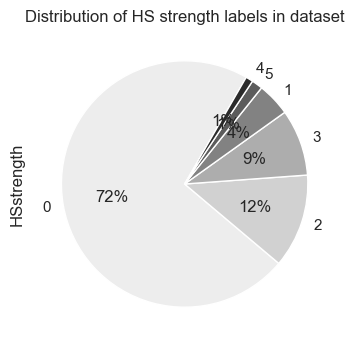

In [25]:
# set sns Seaborn style, color palette, and font to use
#sns.set_theme(style='dark', palette='pastel', font_scale=1.0)
#sns.set_theme(style='dark', palette='colorblind', font_scale=1.0)

plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

df['HSstrength'].value_counts().plot(kind='pie', 
                                          figsize=(4,4),
                                          autopct='%1.0f%%',
                                          startangle=60, 
                                          title='Distribution of HS strength labels in dataset')

#plt.savefig('distribution_of_HS_strength_labels_in_data.png')
#plt.show()

In [26]:
# count labels for only HS in ALL long samples dataset
# collect HS only = df_HS

MIN_VALUE = int(1)
df_HS = df[df['HSstrength'] >= MIN_VALUE]

# count values of each label type
df_HS['HSstrength'].value_counts()

2    1971
3    1397
1     700
5     233
4     152
Name: HSstrength, dtype: int64

<AxesSubplot: title={'center': 'Distribution of HS strength labels in dataset'}, ylabel='HSstrength'>

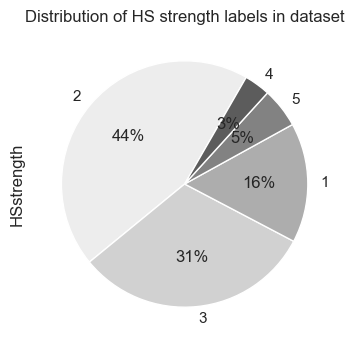

In [27]:
# set sns Seaborn style, color palette, and font to use
#sns.set_theme(style='dark', palette='pastel', font_scale=1.0)
#sns.set_theme(style='dark', palette='colorblind', font_scale=1.0)

plt.figure(figsize=(4,3))
sns.set(style='white', palette='Greys', font_scale=1.0)

df_HS['HSstrength'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%',
                                          startangle=60, 
                                          title='Distribution of HS strength labels in dataset')

#plt.savefig('distribution_of_HS_strength_labels_in_data.png')
#plt.show()

In [28]:
# count labels for only HS in ALL long samples dataset
# collect HS only = df_HS

MIN_VALUE = int(1)
df_HS = longSamples[longSamples['HSstrength'] >= MIN_VALUE]

# count values of each label type
df_HS['HSstrength'].value_counts()

2    1971
3    1395
1     699
5     231
4     152
Name: HSstrength, dtype: int64

In [29]:
# Get data info
df_HS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4448 entries, 257 to 15995
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sample         4448 non-null   object
 1   sentiment      4448 non-null   object
 2   polarity       4448 non-null   int64 
 3   HSbinary       4448 non-null   bool  
 4   HSstrength     4448 non-null   int64 
 5   HStarget       4448 non-null   object
 6   HStopic        4448 non-null   object
 7   HSform         4448 non-null   object
 8   user_nick      4448 non-null   object
 9   cleantext      4448 non-null   object
 10  string_length  4448 non-null   int64 
dtypes: bool(1), int64(3), object(7)
memory usage: 386.6+ KB


The amount of HS samples in longSamplesDF dataset:  15986


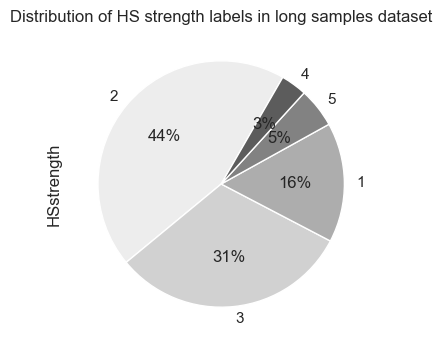

In [30]:
plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

df_HS['HSstrength'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%',
                                          startangle=60, 
                                          title='Distribution of HS strength labels in long samples dataset')

#plt.savefig('distribution_of_HS_strength_labels.png')
#plt.show()

print("The amount of HS samples in longSamplesDF dataset: ", len(longSamplesDF))